<a href="https://colab.research.google.com/github/jw9603/AIM5021_41-/blob/main/5thweek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### TF
- Convert a collection of text documents to a matrix of token counts
- fit_transform() : builds vocabulary dictionary and returns term-document matrix
- transform() : transform documents to document-term matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [ 'This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?',]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())

{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
new = vectorizer.transform(['This is new document'])
print(new.toarray())

[[0 1 0 1 0 0 0 0 1]]


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
data=['I love you so much',
'I love pizza so much',
'I miss you I want you',
'I want pizza']
vectorizer = TfidfVectorizer()
vtr_data = vectorizer.fit_transform(data)
vtr_data = vtr_data.toarray()
featurenames = vectorizer.get_feature_names()
print(featurenames)
print(vtr_data)

['love', 'miss', 'much', 'pizza', 'so', 'want', 'you']
[[0.5        0.         0.5        0.         0.5        0.
  0.5       ]
 [0.5        0.         0.5        0.5        0.5        0.
  0.        ]
 [0.         0.49338588 0.         0.         0.         0.3889911
  0.7779822 ]
 [0.         0.         0.         0.70710678 0.         0.70710678
  0.        ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Classification with the scikit-learn package

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)

clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)

pred = clf.predict(vectors_test)
metrics.f1_score(newsgroups_test.target, pred, average='macro')

0.8821359240272957

In [4]:
# remove metadata
newsgroups_test = fetch_20newsgroups(subset='test',
 remove=('headers', 'footers', 'quotes'),
 categories=categories)

vectors_test = vectorizer.transform(newsgroups_test.data)

newsgroups_train = fetch_20newsgroups(subset='train',
 remove=('headers', 'footers', 'quotes'),
 categories=categories)

vectors = vectorizer.fit_transform(newsgroups_train.data)

clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)

vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test)

### Binary Classification using Densely-connected Neural Network
- References : https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/first_edition/3.5-classifying-movie-reviews.ipynb

In [6]:
import keras
keras.__version__

'2.8.0'

In [8]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [9]:
train_data.shape

(25000,)

In [10]:
train_labels.shape

(25000,)

Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [11]:
max([max(sequence) for sequence in train_data])

9999

#### Preparing the data

Vectorization
- Use one-hot encoding scheme using the most frequent 10,000 words
- For labels, 0 stands for "negative" and 1 stands for "positive"

In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
print('x_train',x_train.shape)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
print('x_test',x_test.shape)

x_train (25000, 10000)
x_test (25000, 10000)


In [17]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

We should also vectorize our labels, which is straightforward:

In [18]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Building our network
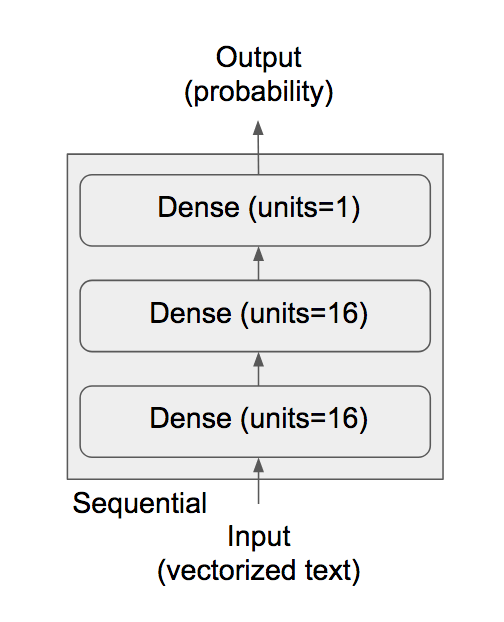

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 74ms/step - loss: 0.5088 - accuracy: 0.7920 - val_loss: 0.3863 - val_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.3017 - accuracy: 0.9065 - val_loss: 0.3109 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 2s 59ms/step - loss: 0.2238 - accuracy: 0.9257 - val_loss: 0.3081 - val_accuracy: 0.8768
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1769 - accuracy: 0.9430 - val_loss: 0.2773 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1433 - accuracy: 0.9548 - val_loss: 0.2876 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 2s 67ms/step - loss: 0.1194 - accuracy: 0.9622 - val_loss: 0.3083 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 2s 68ms/step - loss: 0.1011 - accuracy: 0.9697 - val_loss: 0.3071 - val_accuracy: 0.8827
Epoch 8/20
30

On CPU, this will take less than two seconds per epoch -- training is over in 20 seconds. At the end of every epoch, there is a slight pause as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let's take a look at it:

In [28]:
history_dict = history.history
print(history_dict)
print(history_dict.keys())

{'loss': [0.5087727904319763, 0.3017129600048065, 0.22376275062561035, 0.17686814069747925, 0.14333006739616394, 0.11943848431110382, 0.10108127444982529, 0.0833091139793396, 0.070144884288311, 0.056997526437044144, 0.047928597778081894, 0.04002467915415764, 0.03271748498082161, 0.027745047584176064, 0.019207697361707687, 0.015999939292669296, 0.015388142317533493, 0.008917487226426601, 0.007488988805562258, 0.007645362988114357], 'accuracy': [0.7919999957084656, 0.9064666628837585, 0.9257333278656006, 0.9430000185966492, 0.954800009727478, 0.9621999859809875, 0.9696666598320007, 0.975266695022583, 0.9800000190734863, 0.9863333106040955, 0.9891999959945679, 0.9905999898910522, 0.9928666949272156, 0.994533360004425, 0.9973999857902527, 0.997866690158844, 0.997866690158844, 0.9993333220481873, 0.999666690826416, 0.9988666772842407], 'val_loss': [0.3863317370414734, 0.310919851064682, 0.3081306517124176, 0.2772948145866394, 0.2876252830028534, 0.30831417441368103, 0.30710017681121826, 0.3

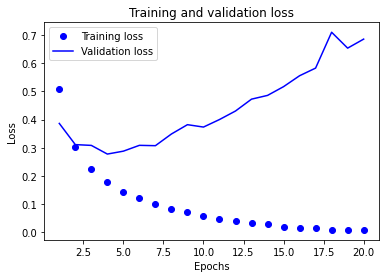

In [30]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

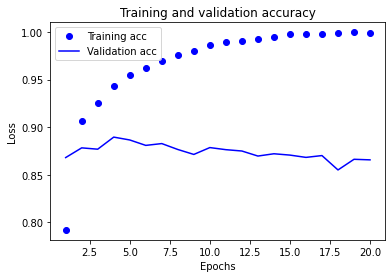

In [31]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 3s 49ms/step - loss: 0.4547 - accuracy: 0.8237
Epoch 2/4
49/49 [==============================] - 2s 36ms/step - loss: 0.2585 - accuracy: 0.9091
Epoch 3/4
49/49 [==============================] - 2s 41ms/step - loss: 0.1975 - accuracy: 0.9304
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3080 - accuracy: 0.8783


In [33]:
results

[0.3079744577407837, 0.878279983997345]

In [35]:
x_test.shape

(25000, 10000)

In [34]:
model.predict(x_test)

array([[0.16953054],
       [0.99982166],
       [0.76939344],
       ...,
       [0.08881819],
       [0.03477752],
       [0.39252725]], dtype=float32)